## Data Preprocessing

#### Import Libraries

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#### Import Dataset

In [2]:
raw_data = pd.read_csv("../Dataset/transactions.csv")

In [3]:
df = raw_data.copy()

In [4]:
# pd.options.display.max_columns = None
# pd.options.display.max_rows = None

In [5]:
df.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


In [7]:
# Check NULL Values
df.isnull().sum()

date            0
store_nbr       0
transactions    0
dtype: int64

In [8]:
df["store_nbr"].unique()

array([25,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 23, 24, 26, 27, 28, 30, 31, 32, 33, 34, 35, 37, 38, 39,
       40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 54, 36, 53, 20, 29, 21,
       42, 22, 52])

In [9]:
len(df["store_nbr"].unique())

54

#### Add City for corresponding store_nbr

In [10]:
store_df = pd.read_csv("../Dataset/stores.csv")

In [11]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [12]:
store_df[store_df.store_nbr == 10].city[9]

'Quito'

In [13]:
city = []
for no in df["store_nbr"] :
    city.append(store_df[store_df.store_nbr == no].city[no-1])

In [14]:
type(city)

list

In [15]:
len(city)

83488

In [16]:
city[3]

'Quito'

In [17]:
df["city"] = city

In [18]:
df.head()

,date,store_nbr,transactions,city
0,2013-01-01,25,770,Salinas
1,2013-01-02,1,2111,Quito
2,2013-01-02,2,2358,Quito
3,2013-01-02,3,3487,Quito
4,2013-01-02,4,1922,Quito


In [19]:
store_df.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


#### Date to Weekday

In [20]:
df["date"][0]

'2013-01-01'

In [21]:
df["date"] = pd.to_datetime(df["date"], format = "%Y/%m/%d")

In [22]:
def weekday(date) :
    return date.weekday()

In [23]:
df["Weekday"] = df["date"].apply(weekday)

In [24]:
df["date"][0]

Timestamp('2013-01-01 00:00:00')

In [25]:
df.head()

,date,store_nbr,transactions,city,Weekday
0,2013-01-01,25,770,Salinas,1
1,2013-01-02,1,2111,Quito,2
2,2013-01-02,2,2358,Quito,2
3,2013-01-02,3,3487,Quito,2
4,2013-01-02,4,1922,Quito,2


In [26]:
df = df.drop("date", axis = 1)

In [27]:
df.head()

,store_nbr,transactions,city,Weekday
0,25,770,Salinas,1
1,1,2111,Quito,2
2,2,2358,Quito,2
3,3,3487,Quito,2
4,4,1922,Quito,2


#### Summary Table

City Vs Transactions

In [28]:
df[df.city == "Quito"].transactions.sum()

70999057

In [29]:
city = store_df["city"].unique()

In [30]:
len(city)

22

In [31]:
 t_val = []
for c in city :
    t_val.append(df[df.city == c].transactions.sum())

In [32]:
city_summary = pd.DataFrame(columns = ["City"], data = city)

In [33]:
city_summary["Transactions"] = t_val

In [34]:
city_summary

,City,Transactions
0,Quito,70999057
1,Santo Domingo,4655266
2,Cayambe,3972488
3,Latacunga,3531356
4,Riobamba,2287850
5,Ibarra,2209898
6,Guaranda,2107489
7,Puyo,504156
8,Ambato,6172615
9,Guayaquil,16546295


In [35]:
city_summary["Transactions"].max()

70999057

In [36]:
city_summary["Transactions"].min()

504156

In [37]:
city_summary = city_summary.sort_values(by = ["Transactions"], ascending = False)
city_summary = city_summary.reset_index(drop = True)

In [38]:
city_summary

,City,Transactions
0,Quito,70999057
1,Guayaquil,16546295
2,Ambato,6172615
3,Cuenca,5673847
4,Santo Domingo,4655266
5,Cayambe,3972488
6,Machala,3945341
7,Latacunga,3531356
8,Loja,2867052
9,Daule,2485687


Plot for City Vs Transactions

<Figure size 432x288 with 0 Axes>

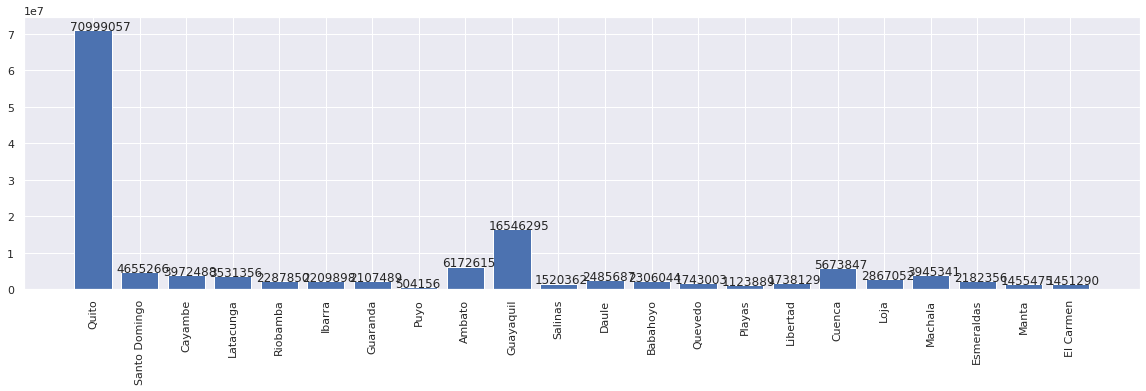

In [39]:
fig = plt.figure()
x = city
height = t_val
f, ax = plt.subplots(figsize=(20,5))
ax.bar(x, height)

for index,data in enumerate(t_val):
    plt.text(x = index-0.5 , y = data , s = f"{data}" , fontdict = dict(fontsize=12))
    
plt.xticks(rotation = 90)
plt.show()

#### Weekday Vs Transaction

In [40]:
Weekday = [0, 1, 2, 3, 4, 5, 6]

In [41]:
w_val = []
for w in range(0, 7) :
    w_val.append(df[df.Weekday == w].transactions.sum())

In [42]:
w_val

[19559625, 19209297, 19287714, 18444528, 19680818, 23410630, 21886333]

In [43]:
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

In [44]:
weekday_summary = pd.DataFrame(columns = ["Day"], data = days)

In [45]:
weekday_summary["Transactions"] = w_val

In [46]:
weekday_summary = weekday_summary.sort_values(by = ["Transactions"], ascending = False)
weekday_summary= weekday_summary.reset_index(drop = True)

In [47]:
weekday_summary

,Day,Transactions
0,Saturday,23410630
1,Sunday,21886333
2,Friday,19680818
3,Monday,19559625
4,Wednesday,19287714
5,Tuesday,19209297
6,Thursday,18444528


Plot for Weekday Vs Transactions

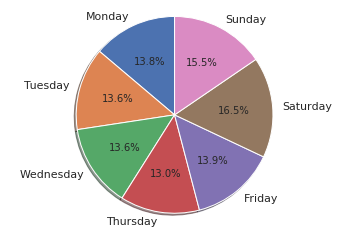

In [48]:
labels = days
sizes = w_val

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels = labels, autopct='%1.1f%%',shadow = True, startangle = 90)
ax1.axis('equal') 

plt.show()

<Figure size 432x288 with 0 Axes>

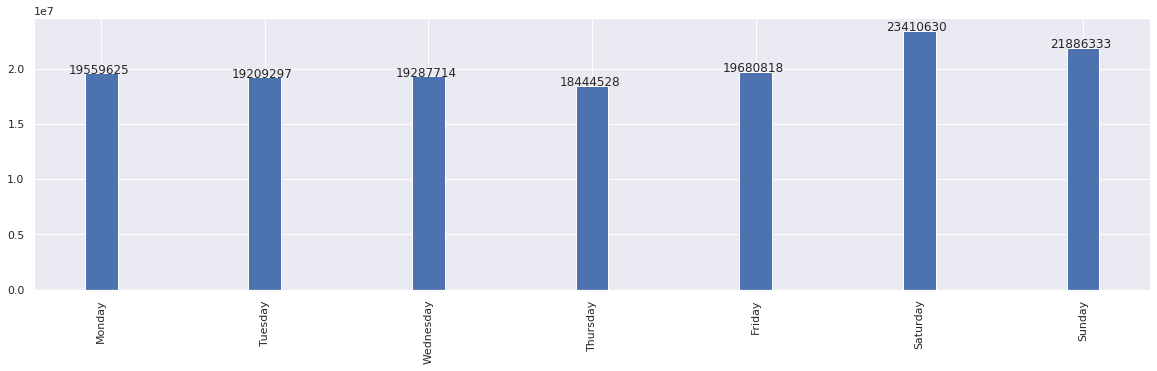

In [49]:
fig = plt.figure()
x = days
height = w_val
f, ax = plt.subplots(figsize=(20,5))
ax.bar(x, height, width = 0.2)

for index,data in enumerate(w_val):
    plt.text(x = index-0.2 , y = data , s = f"{data}" , fontdict = dict(fontsize=12))
    
plt.xticks(rotation = 90)
plt.show()

#### Reorder Columns

In [50]:
df.columns.values

array(['store_nbr', 'transactions', 'city', 'Weekday'], dtype=object)

In [51]:
reorder_col = ['store_nbr', 'city', 'Weekday', 'transactions']

In [52]:
df = df[reorder_col]

In [53]:
df.head()

,store_nbr,city,Weekday,transactions
0,25,Salinas,1,770
1,1,Quito,2,2111
2,2,Quito,2,2358
3,3,Quito,2,3487
4,4,Quito,2,1922


#### Checkpoint

In [54]:
df_check = df.copy()

In [55]:
# df = df_check.copy()

In [56]:
df.head()

,store_nbr,city,Weekday,transactions
0,25,Salinas,1,770
1,1,Quito,2,2111
2,2,Quito,2,2358
3,3,Quito,2,3487
4,4,Quito,2,1922


#### Final Dataset

In [57]:
df_preprocessed_city = city_summary.copy()
df_preprocessed_weekday = weekday_summary.copy()
df_preprocessed = df.copy()

In [58]:
df_preprocessed_weekday.to_excel("../Sheets/Weekday_Transactions.xlsx")  
df_preprocessed_city.to_excel("../Sheets/City_Transactions.xlsx")  
df_preprocessed.to_excel("../Sheets/Transactions.xlsx")  

In [59]:
df_preprocessed_weekday.to_csv("../Preprocessed Datasets/Weekday_Transactions_Preprocessed.csv", index = False)
df_preprocessed_city.to_csv("../Preprocessed Datasets/City_Transactions_Preprocessed.csv", index = False)
df_preprocessed.to_csv("../Preprocessed Datasets/Transactions_Preprocessed.csv", index = False)